In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
lefthanded_data=pd.read_excel("C:/Users/yoges/OneDrive/Desktop/MTE Project data.xlsx")

In [8]:
print(lefthanded_data)


    Age       Male     Female
0    10  12.717558  12.198041
1    11  15.318830  11.144804
2    12  14.808281  11.549240
3    13  13.793744  11.276442
4    14  15.156304  11.572906
..  ...        ...        ...
72   82   7.350204   4.874899
73   83   6.471204   5.672536
74   84   6.510858   5.774881
75   85   7.337968   7.051459
76   86   5.059387   4.680948

[77 rows x 3 columns]


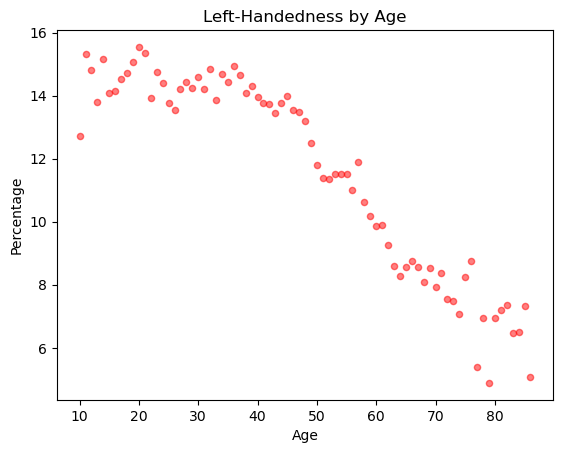

In [9]:
lefthanded_data.plot(x="Age", y=["Male"], kind="scatter",alpha=0.5,color="red")
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.title("Left-Handedness by Age")
plt.show()

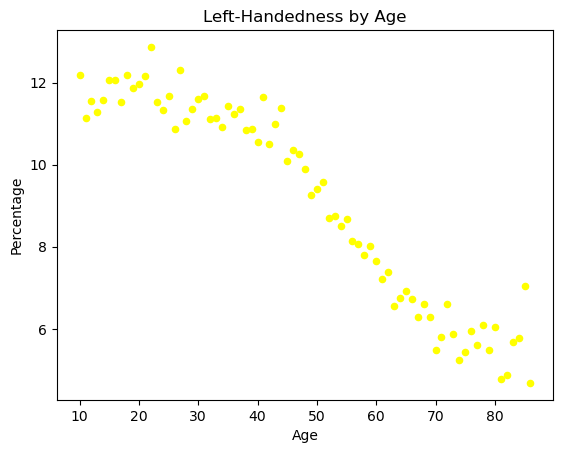

In [10]:
lefthanded_data.plot(x="Age", y=["Female"], kind="scatter",color="yellow")
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.title("Left-Handedness by Age")
plt.show()

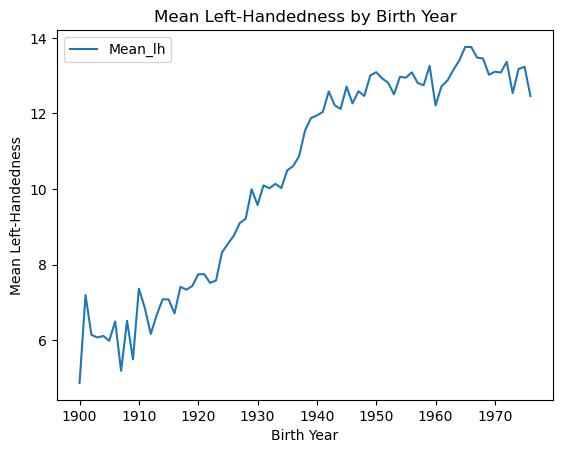

In [11]:
lefthanded_data['Birth_year'] = 1986 - lefthanded_data['Age']
lefthanded_data['Mean_lh'] = (lefthanded_data['Male'] + lefthanded_data['Female']) / 2
lefthanded_data.plot(x="Birth_year", y="Mean_lh", kind="line")
plt.xlabel("Birth Year")
plt.ylabel("Mean Left-Handedness")
plt.title("Mean Left-Handedness by Birth Year")
plt.show()

In [12]:
import numpy as np
early_1900s_rate = lefthanded_data.tail(10)['Mean_lh'].mean() / 100
late_1900s_rate = lefthanded_data.head(10)['Mean_lh'].mean() / 100
ages_of_death = [60, 70, 80, 90]
def calculate_P_LH_given_A(ages_of_death, study_year, early_1900s_rate, late_1900s_rate):
    P_return = []
    for A in ages_of_death:
        if study_year < 1950:
            P_return.append(early_1900s_rate)
        else:
            P_return.append(late_1900s_rate)
    return np.array(P_return)
P_LH_given_A = calculate_P_LH_given_A(ages_of_death, 1986, early_1900s_rate, late_1900s_rate)


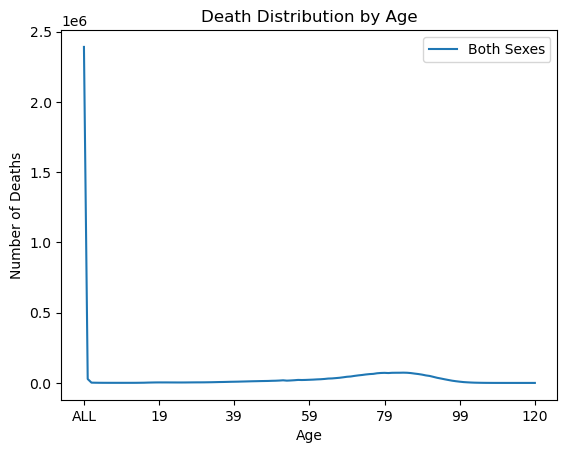

In [12]:

death_distribution_data = pd.read_excel("C:/Users/yoges/OneDrive/Desktop/project 2 mte.xlsx")
death_distribution_data = death_distribution_data.dropna(subset=["Both Sexes"])
death_distribution_data.plot(x="Age", y="Both Sexes", kind="line")
plt.xlabel("Age")
plt.ylabel("Number of Deaths")
plt.title("Death Distribution by Age")
plt.show()


In [13]:
def P_LH_given_A(ages_of_death, study_year):
    P_return = calculate_P_LH_given_A(ages_of_death, study_year, early_1900s_rate, late_1900s_rate)
    return P_return
def P_LH(ages_of_death, study_year):
    p_list = death_distribution_data["Both Sexes"] * P_LH_given_A(ages_of_death, study_year)
    p = p_list.sum()
    N_A = death_distribution_data[death_distribution_data["Age"].isin(ages_of_death)]["Both Sexes"].sum()
    return p / N_A


In [14]:
def P_A_given_LH(A, ages_of_death, study_year):
    P_LH_A = P_LH_given_A(ages_of_death, study_year)[ages_of_death.index(A)]
    P_A = death_distribution_data[death_distribution_data["Age"] == A]["Both Sexes"].values[0] / death_distribution_data["Both Sexes"].sum()
    return P_LH_A * P_A / P_LH(ages_of_death, study_year)


In [19]:
def P_A_given_RH(A, ages_of_death, study_year):
    P_LH_A = P_LH_given_A(ages_of_death, study_year)[ages_of_death.index(A)]
    P_A = death_distribution_data[death_distribution_data["Age"] == A]["Both Sexes"].values[0] / death_distribution_data["Both Sexes"].sum()
    P_RH_A = 1 - P_LH_A
    return P_RH_A * P_A / (1 - P_LH(ages_of_death, study_year))


In [32]:
ages = np.arange(6,115,1) # make a list of ages of death to plot
death_distribution_data = pd.read_excel("C:/Users/yoges/OneDrive/Desktop/project 2 mte.xlsx")
def P_A_given_LH(A, ages_of_death, study_year):
    P_LH_A = P_LH_given_A(ages_of_death, study_year)[ages_of_death.index(A)]
    P_A = death_distribution_data[death_distribution_data["Age"] == A]["Both Sexes"].values[0] / death_distribution_data["Both Sexes"].sum()
    return P_LH_A * P_A / P_LH(ages_of_death, study_year)
def P_A_given_RH(A, ages_of_death, study_year):
    P_LH_A = P_LH_given_A(ages_of_death, study_year)[ages_of_death.index(A)]
    P_A = death_distribution_data[death_distribution_data["Age"] == A]["Both Sexes"].values[0] / death_distribution_data["Both Sexes"].sum()
    P_RH_A = 1 - P_LH_A
    return P_RH_A * P_A / (1 - P_LH(ages_of_death, study_year))



# for each age, calculate the probability of being left- or right-handed
left_handed_probability = P_A_given_LH(ages,1986, death_distribution_data)
right_handed_probability = P_A_given_RH(ages,1986,death_distribution_data)
ax = plt.subplots() # create figure and axis objects
ax.plot(ages, left_handed_probability, label = "Left-handed")
ax.plot(ages, right_handed_probability, label = "Right-handed")
ax.legend()
ax.set_xlabel("Age at death")
ax.set_ylabel("Probability of being age A at death")


TypeError: 'int' object is not iterable

In [27]:
average_lh_age = np.nansum([A * P_A_given_LH(A, ages, 1986) for A in ages])
average_rh_age = np.nansum([A * P_A_given_RH(A, ages, 1986) for A in ages])
print("Mean Age at Death for Left-Handers:", round(average_lh_age, 2))
print("Mean Age at Death for Right-Handers:", round(average_rh_age, 2))
print("Difference in Mean Ages:", round(average_lh_age - average_rh_age, 2))

Mean Age at Death for Left-Handers: 0.0
Mean Age at Death for Right-Handers: 0.0
Difference in Mean Ages: 0.0


In [28]:
P_A_LH_2018 = [P_A_given_LH(A, ages, 2018) for A in ages]
P_A_RH_2018 = [P_A_given_RH(A, ages, 2018) for A in ages]
